**Modern Portfolio Theory (MPT)**

In [10]:
# !pip install empyrial

In [11]:
from empyrial import empyrial, Engine
import pandas as pd
import re

In [12]:
# From universe of stocks, categorize by beta(SPY,Xi) and Corr(SPY,Xi)
list_tickers = ['AAPL', 'ABNB', 'ABT', 'AMZN', 'BA', 'CBOE', 'CCL', 'CSCO', 'GOOGL', 'KO', 'META', 'MMC', 'MRK', 'MS', 'PM', 'SPY', 'TSLA', 'VRTX', 'WFC']

In [13]:
len(list_tickers)

19

In [14]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_start = pd.to_datetime(date_today) - pd.DateOffset(months=36)
date_start = date_start.strftime("%Y-%m-%d")
date_start

'2021-01-12'

In [15]:
portfolio = Engine(
    start_date = date_start,                                      
    portfolio = list_tickers,
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

Start date: 2021-01-12
End date: 2024-01-12


,Backtest
,
Annual return,14.19%
Cumulative return,48.75%
Annual volatility,17.05 %
Winning day ratio,52.39%
Sharpe ratio,0.86
Calmar ratio,0.69
Information ratio,0.0
Stability,0.5
Max Drawdown,-20.68 %


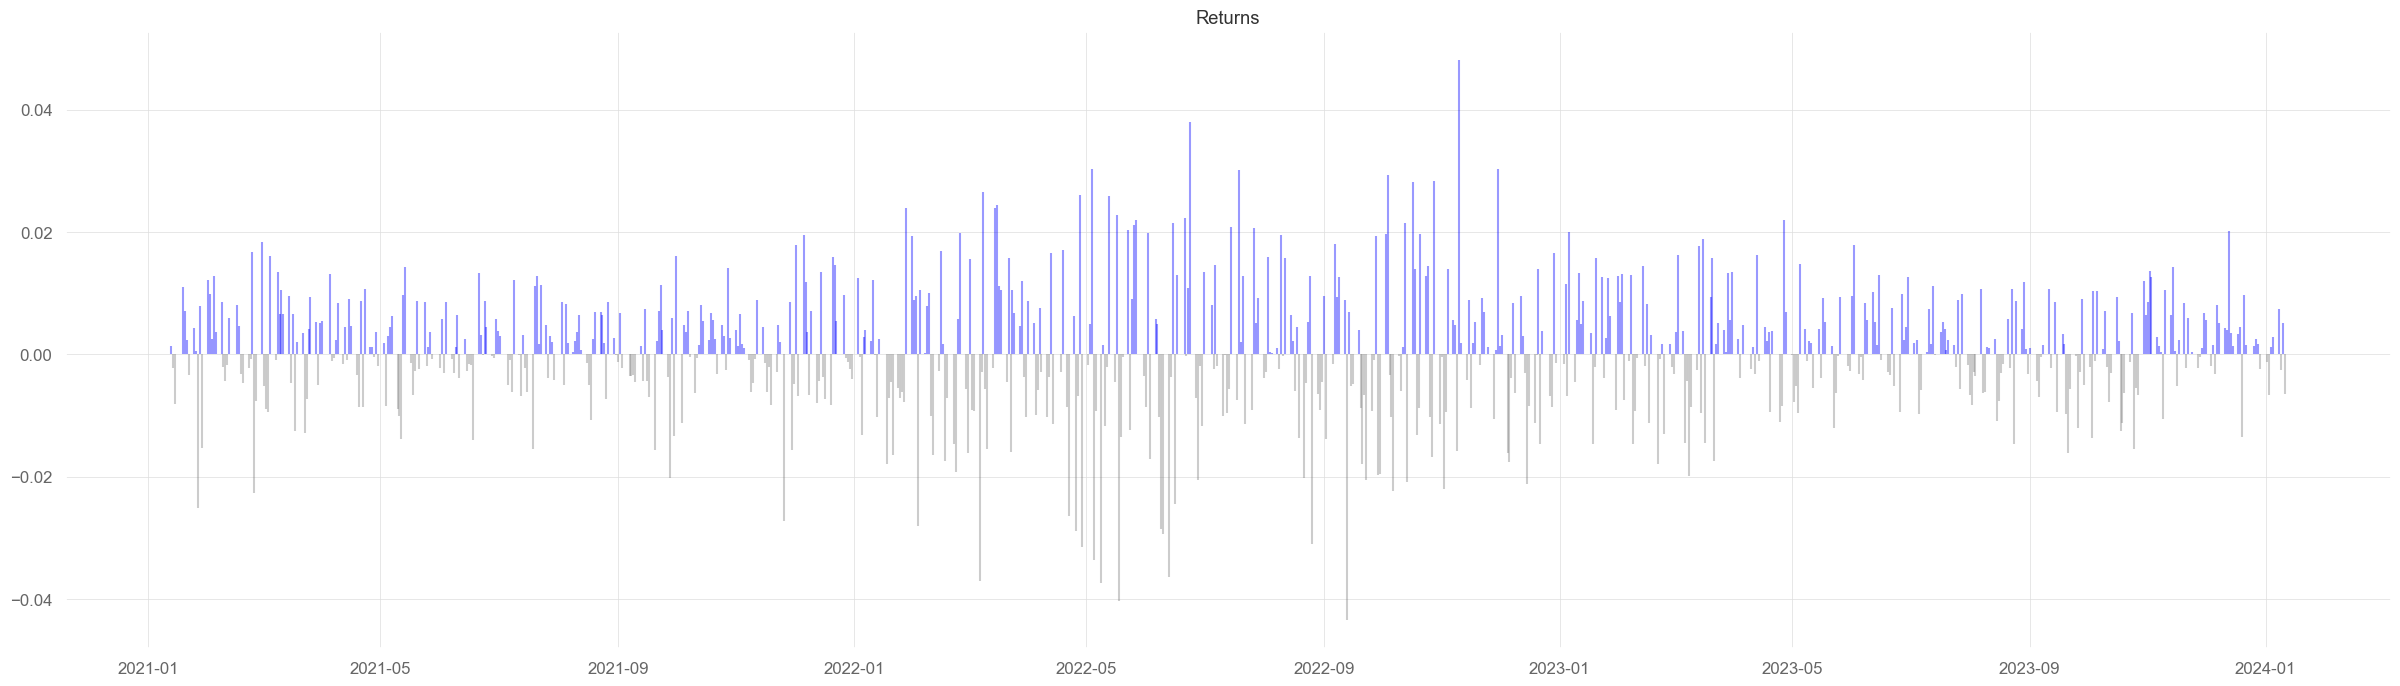

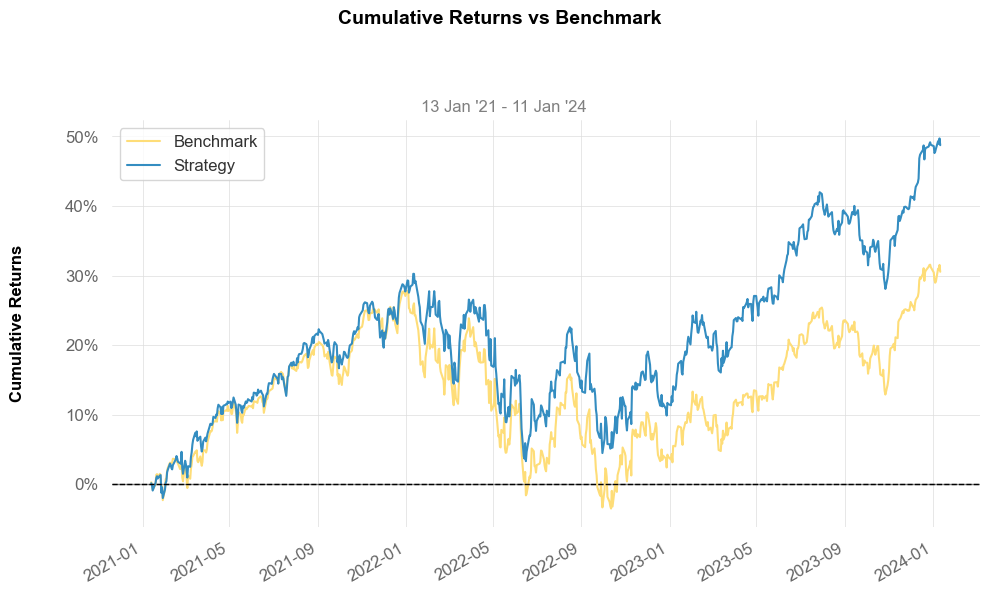

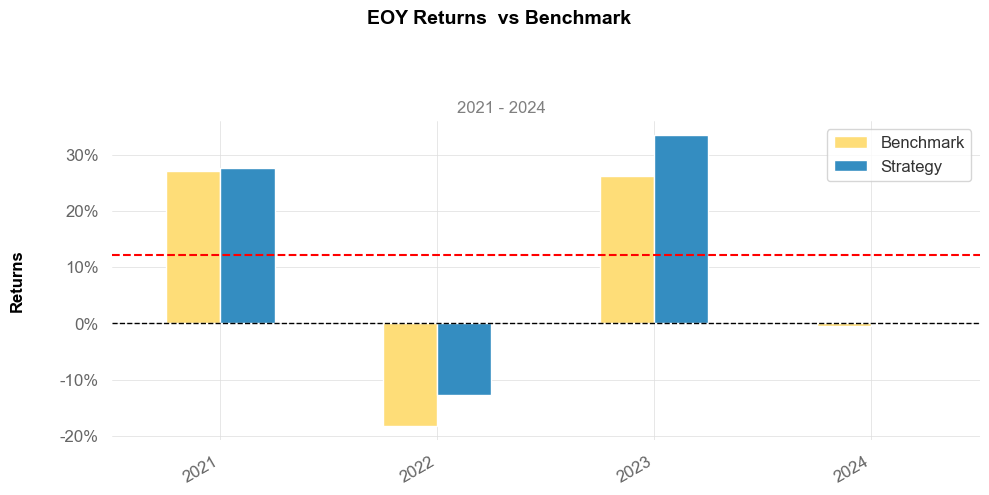

In [16]:
try:
    empyrial(portfolio)
except TypeError as e:
    pass 

# Summary of allocations

In [17]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-02-11,2021-03-13,2021-04-13,2021-05-13,2021-06-13,2021-07-13,2021-08-12,2021-09-12,2021-10-12,2021-11-12,...,2023-05-13,2023-06-13,2023-07-13,2023-08-12,2023-09-12,2023-10-12,2023-11-12,2023-12-12,2024-01-12,2024-01-12
AAPL,0.05178,0.04978,0.04918,0.04807,0.04860,0.04982,0.04992,0.04993,0.04993,0.05009,...,0.04821,0.04847,0.04872,0.04892,0.04887,0.04916,0.04943,0.04960,0.04972,0.04972
ABNB,0.05978,0.05141,0.04848,0.05004,0.04851,0.04872,0.04878,0.04807,0.04707,0.04684,...,0.03229,0.03224,0.03246,0.03264,0.03308,0.03317,0.03337,0.03338,0.03357,0.03357
ABT,0.06721,0.06351,0.06213,0.05997,0.05946,0.05944,0.06017,0.06046,0.06049,0.06040,...,0.06311,0.06301,0.06291,0.06264,0.06255,0.06238,0.06269,0.06256,0.06246,0.06246
AMZN,0.05148,0.05217,0.05248,0.05187,0.05217,0.05455,0.05393,0.05389,0.05348,0.05342,...,0.04085,0.04109,0.04129,0.04164,0.04175,0.04175,0.04183,0.04204,0.04231,0.04231
BA,0.04737,0.03761,0.03875,0.03991,0.04184,0.04257,0.04164,0.04168,0.04206,0.04314,...,0.04449,0.04457,0.04505,0.04501,0.04504,0.04557,0.04584,0.04580,0.04612,0.04612
CBOE,0.05213,0.05395,0.05628,0.05904,0.05927,0.05726,0.05759,0.05789,0.05858,0.05823,...,0.06948,0.06923,0.06881,0.06868,0.06863,0.06858,0.06858,0.06838,0.06819,0.06819
CCL,0.05042,0.05341,0.04615,0.04411,0.04378,0.04365,0.04010,0.03986,0.04070,0.04133,...,0.02011,0.02020,0.02034,0.02081,0.02127,0.02153,0.02160,0.02209,0.02225,0.02225
CSCO,0.05820,0.06055,0.05876,0.05698,0.05665,0.05610,0.05633,0.05604,0.05598,0.05624,...,0.06149,0.06147,0.06125,0.06131,0.06129,0.06120,0.06119,0.06083,0.06087,0.06087
GOOGL,0.04576,0.04711,0.04875,0.04820,0.04854,0.04955,0.04964,0.04981,0.04942,0.05022,...,0.04593,0.04625,0.04626,0.04625,0.04638,0.04646,0.04620,0.04647,0.04685,0.04685
KO,0.05596,0.06300,0.06294,0.06300,0.06208,0.06126,0.06106,0.06088,0.06109,0.06084,...,0.07301,0.07272,0.07236,0.07195,0.07175,0.07132,0.07126,0.07096,0.07070,0.07070


In [18]:
print("Summary of the portfolio at the most recent date:") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

Summary of the portfolio at the most recent date:


,2024-01-12
AAPL,0.04972
ABNB,0.03357
ABT,0.06246
AMZN,0.04231
BA,0.04612
CBOE,0.06819
CCL,0.02225
CSCO,0.06087
GOOGL,0.04685
KO,0.07070
